

# Solution for "D&D.Sci (Easy Mode): On The Construction Of Impossible Structures"

Source: https://www.lesswrong.com/posts/Syfq6MwgdZhHg9vha/d-and-d-sci-easy-mode-on-the-construction-of-impossible

List of D&D.Sci tasks: https://www.lesswrong.com/posts/6QfatwCcmuaDBNeDv/d-and-d-sci-scenario-index

> **D&D.Sci (Easy Mode): On The Construction Of Impossible Structures**
>
> by abstractapplic
> 17th May 2024
> 
> This is a D&D.Sci scenario: a puzzle where players are given a dataset to analyze and an objective to pursue using information from that dataset.
> 
> Duke Arado’s obsession with physics-defying architecture has caused him to run into a small problem. His problem is not – he affirms – that his interest has in any way waned: the menagerie of fantastical buildings which dot his territories attest to this, and he treasures each new time-bending tower or non-Euclidean mansion as much as the first. Nor – he assuages – is it that he’s having trouble finding talent: while it’s true that no individual has ever managed to design more than one impossible structure, it’s also true that he scarcely goes a week without some architect arriving at his door, haunted by alien visions, begging for the resources to bring them into reality. And finally – he attests – his problem is definitely not that “his mad fixation on lunatic constructions is driving him to the brink of financial ruin”, as the townsfolk keep saying: he’ll have you know he’s recently brought an accountant in to look over his expenditures, and he’s confirmed he has the funds to keep pursuing this hobby long into his old age.
>
> Rather, his problem is the local zoning board. Concerned citizens have come together to force him to limit new creations near populated areas, claiming they “disrupt the neighbourhood character” and “conjure eldritch music to lure our children away while we sleep”. While in previous years he was free to – and did – support any qualified architect who showed up with sufficiently strange blueprints, the Duke is now forced to be selective: at present, he has fourteen applicants waiting on his word, and only four viable building sites. He finds this particularly galling, since about half the time when an architect finishes their work, the resulting building ends up not distorting the fabric of spacetime, and instead just kind of looking weird. It’s entirely possible that if he picks at random, he’ll end up with no new impossible structures at all this month, which – he asserts – would utterly break his heart.
> 
> This is where you come in. Using his [records](https://raw.githubusercontent.com/H-B-P/d-and-d-sci-impossible-structures/main/data.csv) from previous years, he wants you to evaluate [his current crop of architects’ plans](https://raw.githubusercontent.com/H-B-P/d-and-d-sci-impossible-structures/main/architect_proposals.txt) and pick out the four most likely to successfully defy the laws of Nature. (If there are any ties, he’d like you to resolve them in favour of whichever option is cheapest; however, his primary concern remains the instantiation of as much impossibility as possible.)


## 1. Exploration and analysis

### 1.1. Overview of the data

Before exploring, let's take a first look at the available data and its structure:

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# train data:
data = pd.read_csv("./source/data.csv")

# test data:
with open("./source/architect_proposals.txt",'r') as f:
    txt_test = f.readlines()

print("data.info():")
print(data.info())
print('\ndata.describe():\n', data.describe())

print("\nTest data:\n" + "".join(txt_test))

data.head()


data.info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Background of Architect          954 non-null    object
 1   Proposed Structure Type          954 non-null    object
 2   Required Construction Materials  954 non-null    object
 3   Characterization of Blueprints   954 non-null    object
 4   Is Structure Impossible?         954 non-null    object
 5   Cost of Structure                954 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 44.8+ KB
None

data.describe():
        Cost of Structure
count       9.540000e+02
mean        1.517693e+05
std         2.462521e+05
min         5.070000e+02
25%         2.743850e+04
50%         5.937150e+04
75%         1.007272e+05
max         1.041725e+06

Test data:
Architect A, who was Self-Taught, presents Hastily Sketched blueprints proposing to

,Background of Architect,Proposed Structure Type,Required Construction Materials,Characterization of Blueprints,Is Structure Impossible?,Cost of Structure
0,Apprenticed under T. Geisel,Mansion,Glass and Dreams,Deceptively Ordinary,No,29719
1,Apprenticed under T. Geisel,Mechanism,Silver and Steel,Hastily Sketched,No,79489
2,Apprenticed under M. Escher,Tower,Steel and Silver,Obsessively Detailed,No,100373
3,Self-Taught,Mansion,Wood and Dreams,Obsessively Detailed,Yes,736
4,Apprenticed under P. Stamatin,Mansion,Glass and Silver,Hastily Sketched,Yes,113183


It seems that most columns have a limited number of unique values. Let's explore them further.

Also, let's rename the inconveniently long column names and create a numeric target column, "is_impossible".

In [18]:
data.rename( 
    columns = {
        'Background of Architect': 'background',
        'Proposed Structure Type': 'structure',
        'Required Construction Materials': 'materials',
        'Characterization of Blueprints': 'blueprints',
        'Is Structure Impossible?': 'impossible',
        'Cost of Structure': 'cost'
    }, 
    inplace = True
)
data['is_impossible'] = np.where(data['impossible']=='Yes', 1, 0)

print('Dataset unique values:')
print(data.nunique(),"\n")

for col in data.columns.tolist()[:-2]:
    print(f'"{col}": {data[col].unique()}')

data.head()

Dataset unique values:
background         6
structure          4
materials         20
blueprints         3
impossible         2
cost             951
is_impossible      2
dtype: int64 

"background": ['Apprenticed under T. Geisel' 'Apprenticed under M. Escher' 'Self-Taught'
 'Apprenticed under P. Stamatin' 'Apprenticed under R. Penrose'
 'Apprenticed under B. Johnson']
"structure": ['Mansion' 'Mechanism' 'Tower' 'Library']
"materials": ['Glass and Dreams' 'Silver and Steel' 'Steel and Silver'
 'Wood and Dreams' 'Glass and Silver' 'Wood and Nightmares'
 'Silver and Wood' 'Wood and Silver' 'Glass and Steel' 'Steel and Wood'
 'Wood and Glass' 'Silver and Glass' 'Steel and Nightmares'
 'Glass and Nightmares' 'Silver and Nightmares' 'Silver and Dreams'
 'Glass and Wood' 'Steel and Dreams' 'Steel and Glass' 'Wood and Steel']
"blueprints": ['Deceptively Ordinary' 'Hastily Sketched' 'Obsessively Detailed']
"impossible": ['No' 'Yes']


,background,structure,materials,blueprints,impossible,cost,is_impossible
0,Apprenticed under T. Geisel,Mansion,Glass and Dreams,Deceptively Ordinary,No,29719,0
1,Apprenticed under T. Geisel,Mechanism,Silver and Steel,Hastily Sketched,No,79489,0
2,Apprenticed under M. Escher,Tower,Steel and Silver,Obsessively Detailed,No,100373,0
3,Self-Taught,Mansion,Wood and Dreams,Obsessively Detailed,Yes,736,1
4,Apprenticed under P. Stamatin,Mansion,Glass and Silver,Hastily Sketched,Yes,113183,1


It seems that we have 4 categorical features that may or may not effect impossibility of the structure and its cost: "background", "structure", "materials", "blueprints". The "materials" feature consists of two types of construction materials in some order. It is possible to transform this feature into several one-hot-encoded columns (like "is_glass", "is_wood", "is_dreams" etc.), but it is still unknown if the order carries any information.

### 1.2. Single-feature analysis

As the first step, let's see how individual features affect the impossibility and cost of the structure.

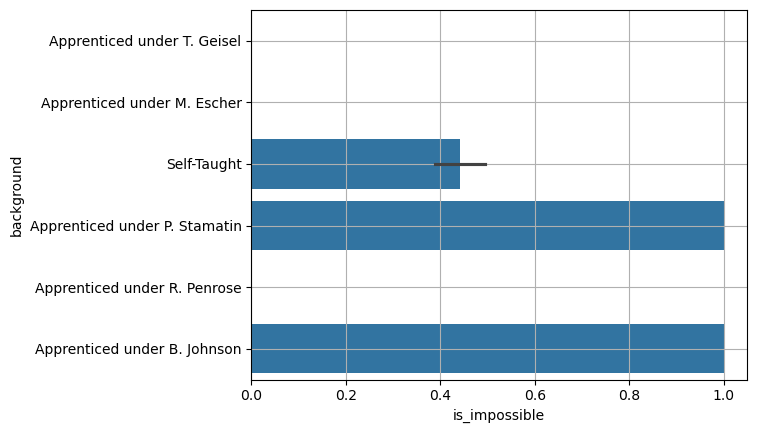

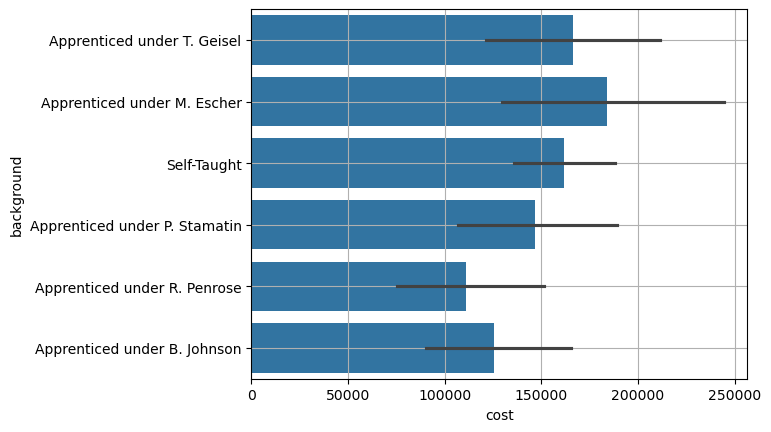

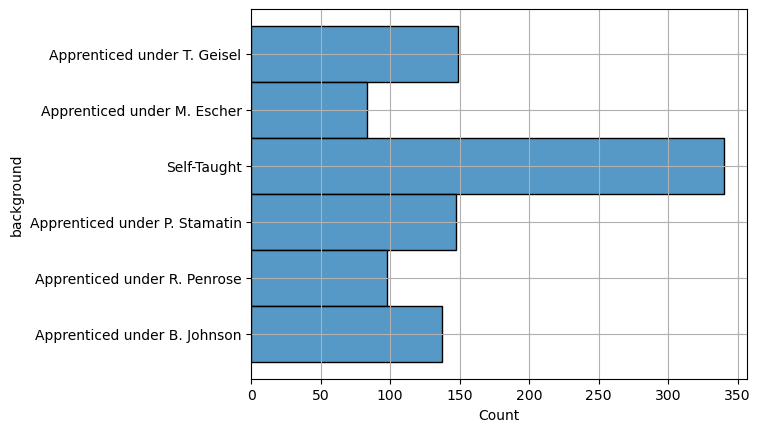

In [19]:
def plot_feature_stats(feature):
    sns.barplot(data=data, y=feature, x='is_impossible', orient='h')
    plt.grid(); plt.show()
    sns.barplot(data=data, y=feature, x='cost', orient='h')
    plt.grid(); plt.show()
    sns.histplot(data=data, y=feature)
    plt.grid(); plt.show()

plot_feature_stats('background')

**Observation #1: students of Johnson and Stamatin seem to create impossible structures with 100% probability.**

There are, in fact, five projects in a test set by students of these two teachers. We will need to choose the cheapest ones from this group unless we can identify any other items with a high probability of success.

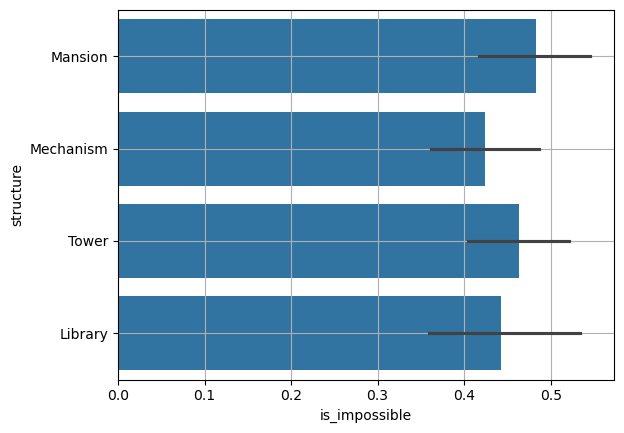

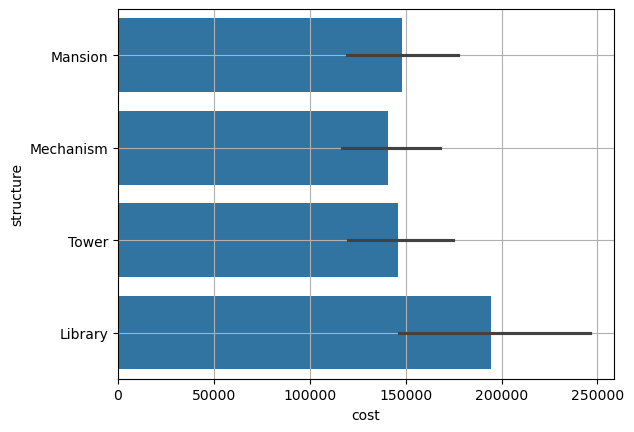

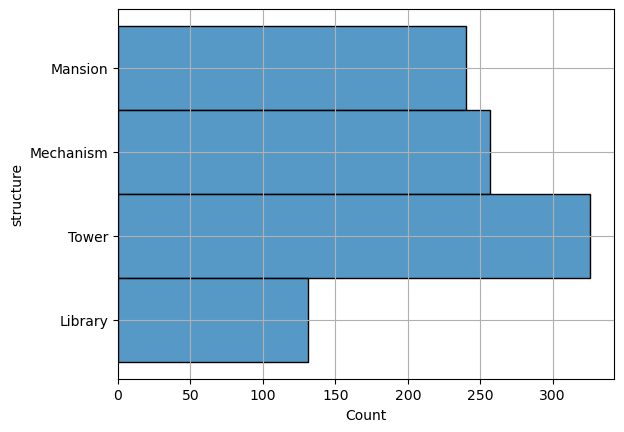

In [20]:
plot_feature_stats('structure')

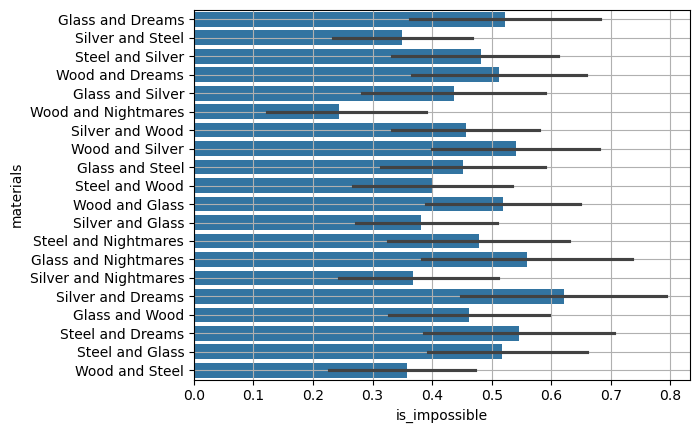

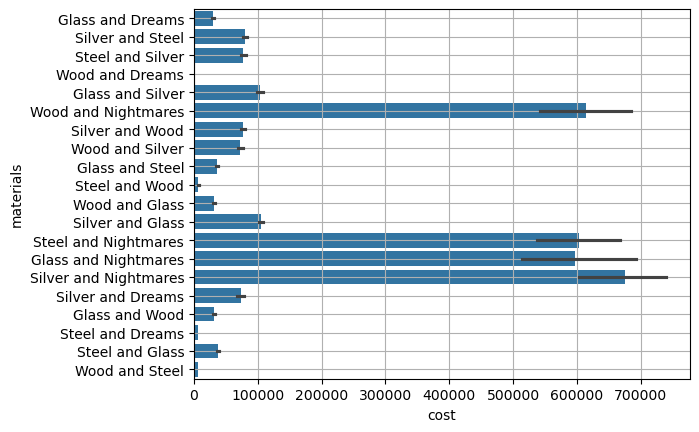

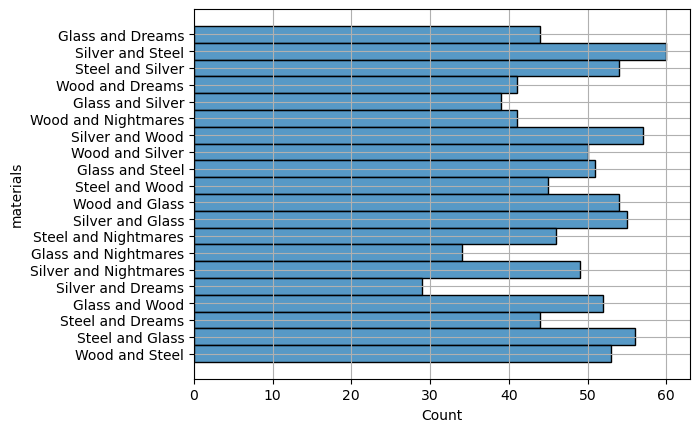

In [21]:
plot_feature_stats('materials')

**Observation #2: Nightmares require a lot of money, significantly more than any other material.**

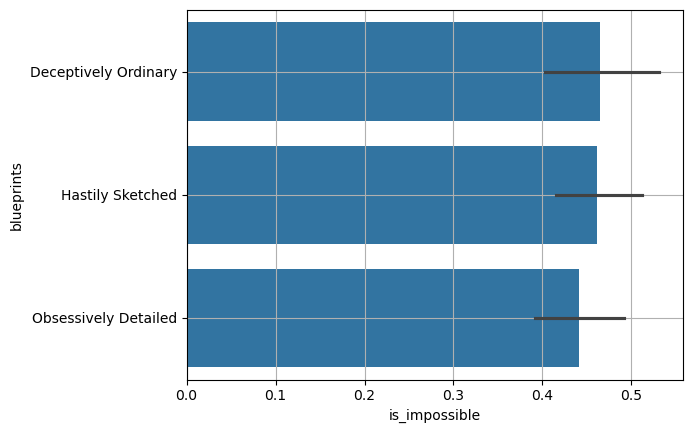

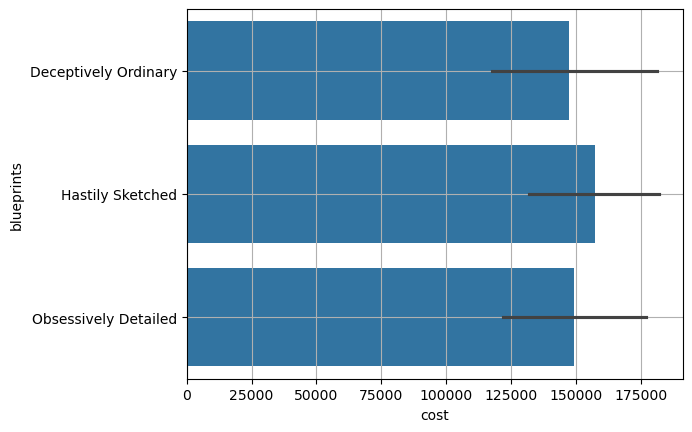

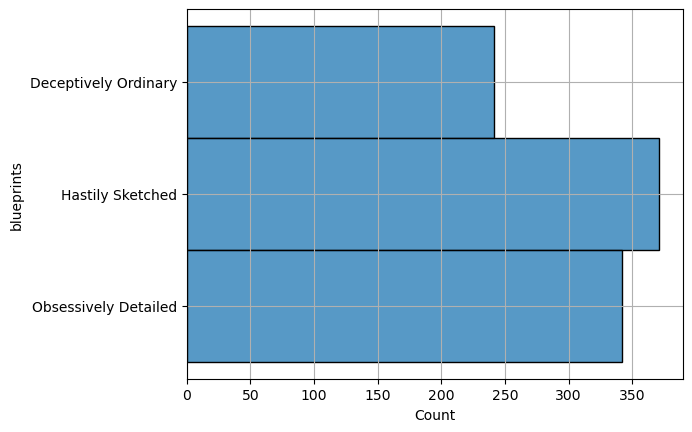

In [22]:
plot_feature_stats('blueprints')

**Based on our two observations, we can select the four cheapest structures out of the five most likely to be impossible:**

1. Architect D, who was Apprenticed under B. Johnson, presents Obsessively Detailed blueprints proposing to build a Tower of Steel and Silver
2. Architect E, who was Apprenticed under P. Stamatin, presents Obsessively Detailed blueprints proposing to build a Mechanism of Silver and Wood
3. Architect H, who was Apprenticed under B. Johnson, presents Obsessively Detailed blueprints proposing to build a Tower of Silver and Steel
4. Architect K, who was Apprenticed under P. Stamatin, presents Hastily Sketched blueprints proposing to build a Library of Glass and Dreams

The following project seems to have a high probability of impossibility but comes at a high cost:
* Architect G, who was Apprenticed under P. Stamatin, presents Hastily Sketched blueprints proposing to build a Mechanism of Glass and Nightmares

To be more sure in our conclusion, let's also explore feature interactions, specifically interaction of "background" with other features.

### 1.3. Feature interaction

In [23]:
def get_heatmap(col1, col2, target='is_impossible'):
    heatmap_data = data.groupby([col1, col2])[target].mean().reset_index()
    heatmap_pivot = heatmap_data.pivot(index=col1, columns=col2, values=target)
    return heatmap_pivot

get_heatmap('background', 'structure')

structure,Library,Mansion,Mechanism,Tower
background,,,,
Apprenticed under B. Johnson,1.000000,1.00000,1.000000,1.000000
Apprenticed under M. Escher,0.000000,0.00000,0.000000,0.000000
Apprenticed under P. Stamatin,1.000000,1.00000,1.000000,1.000000
Apprenticed under R. Penrose,0.000000,0.00000,0.000000,0.000000
Apprenticed under T. Geisel,0.000000,0.00000,0.000000,0.000000
Self-Taught,0.454545,0.47619,0.408602,0.436975


In [24]:
get_heatmap('background', 'materials').T

background,Apprenticed under B. Johnson,Apprenticed under M. Escher,Apprenticed under P. Stamatin,Apprenticed under R. Penrose,Apprenticed under T. Geisel,Self-Taught
materials,,,,,,
Glass and Dreams,1.0,0.0,1.0,NaN,0.0,0.380952
Glass and Nightmares,1.0,0.0,1.0,0.0,0.0,0.533333
Glass and Silver,1.0,0.0,1.0,0.0,0.0,0.428571
Glass and Steel,1.0,0.0,1.0,0.0,0.0,0.375000
Glass and Wood,1.0,0.0,1.0,0.0,0.0,0.600000
Silver and Dreams,1.0,0.0,1.0,0.0,0.0,0.800000
Silver and Glass,1.0,0.0,1.0,0.0,0.0,0.291667
Silver and Nightmares,1.0,0.0,1.0,0.0,0.0,0.318182
Silver and Steel,1.0,0.0,1.0,0.0,0.0,0.380952


In [25]:
get_heatmap('background', 'blueprints')

blueprints,Deceptively Ordinary,Hastily Sketched,Obsessively Detailed
background,,,
Apprenticed under B. Johnson,1.000000,1.00000,1.000000
Apprenticed under M. Escher,0.000000,0.00000,0.000000
Apprenticed under P. Stamatin,1.000000,1.00000,1.000000
Apprenticed under R. Penrose,0.000000,0.00000,0.000000
Apprenticed under T. Geisel,0.000000,0.00000,0.000000
Self-Taught,0.440476,0.43609,0.447154


It seems that there is at least one example of each pair of features (including "background"), except for background="Apprenticed under R. Penrose", material="Glass and Dreams". This could indicate that the effect of background on structure impossibility is direct, rather than due to interaction with any other feature.

Let's also try to compare the cost of structures that use Nightmares with those that don't.

In [26]:
data['uses_nightmares'] = data['materials'].apply(lambda s: 'Nightmares' in s)
data.groupby('uses_nightmares').agg(
    mean_cost = ('cost', 'mean'),
    min_cost = ('cost', 'min'),
    max_cost = ('cost','max'),
    cnt = ('cost','count')
)

,mean_cost,min_cost,max_cost,cnt
uses_nightmares,,,,
False,49061.599490,507,137127,784
True,625433.270588,206494,1041725,170


**Observation #3: Any structure that requires Nightmares is more expensive than any structure that does not.**

It seems that the feature interaction analysis confirms that our initial selection is, in fact, optimal:
1. Architect D, who was Apprenticed under B. Johnson, presents Obsessively Detailed blueprints proposing to build a Tower of Steel and Silver
2. Architect E, who was Apprenticed under P. Stamatin, presents Obsessively Detailed blueprints proposing to build a Mechanism of Silver and Wood
3. Architect H, who was Apprenticed under B. Johnson, presents Obsessively Detailed blueprints proposing to build a Tower of Silver and Steel
4. Architect K, who was Apprenticed under P. Stamatin, presents Hastily Sketched blueprints proposing to build a Library of Glass and Dreams

## 2. Verifying our conclusions using gradient boosting

First, we should create a compatible table from the test data.

In [27]:
# separators = [' who was ', ', presents ', ' proposing to build a ', ' of ']
def get_row(s):
    idx, s = s.split(', who was ')
    background, s = s.split(', presents ')
    blueprints, s = s.split(' proposing to build a ')
    structure, materials = s.split(' of ')
    return {
        'name': idx,
        'background': background.strip(),
        'structure': structure.strip(),
        'materials': materials.strip(),
        'blueprints': blueprints.strip()
    }

get_row(txt_test[0])

{'name': 'Architect A',
 'background': 'Self-Taught',
 'structure': 'Tower',
 'materials': 'Steel and Dreams',
 'blueprints': 'Hastily Sketched blueprints'}

In [28]:
features = ['background', 'structure', 'materials', 'blueprints']
df_test = pd.DataFrame([get_row(s) for s in txt_test])[['name']+features]

df_test

,name,background,structure,materials,blueprints
0,Architect A,Self-Taught,Tower,Steel and Dreams,Hastily Sketched blueprints
1,Architect B,Apprenticed under R. Penrose,Mansion,Steel and Nightmares,Hastily Sketched blueprints
2,Architect C,Apprenticed under R. Penrose,Library,Wood and Glass,Obsessively Detailed blueprints
3,Architect D,Apprenticed under B. Johnson,Tower,Steel and Silver,Obsessively Detailed blueprints
4,Architect E,Apprenticed under P. Stamatin,Mechanism,Silver and Wood,Obsessively Detailed blueprints
5,Architect F,Apprenticed under R. Penrose,Mansion,Silver and Dreams,Hastily Sketched blueprints
6,Architect G,Apprenticed under P. Stamatin,Mechanism,Glass and Nightmares,Hastily Sketched blueprints
7,Architect H,Apprenticed under B. Johnson,Tower,Silver and Steel,Obsessively Detailed blueprints
8,Architect I,Self-Taught,Mansion,Wood and Glass,Obsessively Detailed blueprints
9,Architect J,Apprenticed under T. Geisel,Tower,Wood and Glass,Hastily Sketched blueprints


### 2.1. Evaluating the impossibility of the project

In [29]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, accuracy_score

X = data[features]
y = data['is_impossible']

X1 = df_test[features]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.01,
    depth=6,
    eval_metric='Accuracy',
    random_seed=42,
    verbose=0,
    cat_features=features
)

model.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    use_best_model=True,
    verbose=False
)

In [30]:
df_test['proba'] = model.predict_proba(X1)[:,1]
df_test.sort_values(by='proba', ascending = False)

,name,background,structure,materials,blueprints,proba
3,Architect D,Apprenticed under B. Johnson,Tower,Steel and Silver,Obsessively Detailed blueprints,0.966812
4,Architect E,Apprenticed under P. Stamatin,Mechanism,Silver and Wood,Obsessively Detailed blueprints,0.966457
10,Architect K,Apprenticed under P. Stamatin,Library,Glass and Dreams,Hastily Sketched blueprints,0.965292
6,Architect G,Apprenticed under P. Stamatin,Mechanism,Glass and Nightmares,Hastily Sketched blueprints,0.964997
7,Architect H,Apprenticed under B. Johnson,Tower,Silver and Steel,Obsessively Detailed blueprints,0.964399
11,Architect L,Self-Taught,Mechanism,Steel and Wood,Obsessively Detailed blueprints,0.434488
13,Architect N,Self-Taught,Mechanism,Steel and Wood,Hastily Sketched blueprints,0.434488
0,Architect A,Self-Taught,Tower,Steel and Dreams,Hastily Sketched blueprints,0.420803
8,Architect I,Self-Taught,Mansion,Wood and Glass,Obsessively Detailed blueprints,0.376721
9,Architect J,Apprenticed under T. Geisel,Tower,Wood and Glass,Hastily Sketched blueprints,0.054385


**Observation #4. We may conclude that a trained catboost model is, in fact, consistent with our original selection - the five most surely impossible structures correspond to those by students of Stamatin and Johnson.**

### 2.2. Evaluating the project cost

In [31]:
from catboost import CatBoostRegressor

# X = data[features]
y = data['cost']

# X1 = df_test[features]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.03,
    depth=6,
    eval_metric='RMSE',
    random_seed=42,
    verbose=0,
    cat_features=features
)

model.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    use_best_model=True,
    verbose=False
)

In [32]:
df_test['cost_estimate'] = model.predict(X1)
df_test.sort_values(by='cost_estimate', ascending = True)

,name,background,structure,materials,blueprints,proba,cost_estimate
11,Architect L,Self-Taught,Mechanism,Steel and Wood,Obsessively Detailed blueprints,0.434488,17058.843948
13,Architect N,Self-Taught,Mechanism,Steel and Wood,Hastily Sketched blueprints,0.434488,17058.843948
0,Architect A,Self-Taught,Tower,Steel and Dreams,Hastily Sketched blueprints,0.420803,18010.027815
8,Architect I,Self-Taught,Mansion,Wood and Glass,Obsessively Detailed blueprints,0.376721,19534.876700
9,Architect J,Apprenticed under T. Geisel,Tower,Wood and Glass,Hastily Sketched blueprints,0.054385,19742.132228
12,Architect M,Apprenticed under T. Geisel,Tower,Glass and Steel,Hastily Sketched blueprints,0.051409,20556.449642
10,Architect K,Apprenticed under P. Stamatin,Library,Glass and Dreams,Hastily Sketched blueprints,0.965292,28631.988241
2,Architect C,Apprenticed under R. Penrose,Library,Wood and Glass,Obsessively Detailed blueprints,0.054069,32353.220865
7,Architect H,Apprenticed under B. Johnson,Tower,Silver and Steel,Obsessively Detailed blueprints,0.964399,42449.199748
3,Architect D,Apprenticed under B. Johnson,Tower,Steel and Silver,Obsessively Detailed blueprints,0.966812,44048.579003


**Observation #5. Predictions from catboost-based model confirm our selection of the most expensive project out of the five initially picked.**

## 3. Conclusion

Based on our exploratory analysis and further confirmation by the catboost-based models, we can conclude that the optimal choice is:
1. Architect D, who was Apprenticed under B. Johnson, presents Obsessively Detailed blueprints proposing to build a Tower of Steel and Silver
2. Architect E, who was Apprenticed under P. Stamatin, presents Obsessively Detailed blueprints proposing to build a Mechanism of Silver and Wood
3. Architect H, who was Apprenticed under B. Johnson, presents Obsessively Detailed blueprints proposing to build a Tower of Silver and Steel
4. Architect K, who was Apprenticed under P. Stamatin, presents Hastily Sketched blueprints proposing to build a Library of Glass and Dreams

Main reasons for this choice: 
1. Projects of students of Stamatin and Johnson have the highest probability of impossibility. There are five such projects.
2. Projects requiring Nightmares as one of the materials tend to be the most expensive. Exactly four projects remain after step 1 filtering that do not require Nightmares.

## 4. Evaluating the solution

The underlying ruleset for this scenario can be found [here](https://www.lesswrong.com/posts/oGXmwzsDqKM9uP5dA/d-and-d-sci-easy-mode-on-the-construction-of-impossible-1)

It is in full agreement with the conclusions from the previous section.

> Ruleset
> Impossibility
> Impossibility is entirely decided by who a given architect apprenticed under. Fictional impossiblists Stamatin and Johnson invariably produce impossibility-producing architects; real-world impossiblists Penrose, Escher and Geisel always produce architects whose works just kind of look weird; the self-taught break Nature's laws 43% of the time.
> 
> Cost
> Cost is entirely decided by materials. In particular, every structure created using Nightmares is more expensive than every structure without them.
> 
> Strategy
> The five architects who would guarantee an impossible structure are D, E, G, H, and K. Of these, G - and only G - intends to use Nightmares as construction material. The optimal choices given the Duke's stated preferences are therefore [D, E, H, K].
> 
> Reflections
> This challenge was created with the intent of being egregiously easy and anomalously accessible. From the performances I saw, it looks like it fit the bill: congratulations to everyone who played publicly on reaching my intended solution. (Particular congratulations to aphyer for providing said solution within an hour of me posting the challenge, and to new player Lorxus for managing to correctly identify every named impossiblist on their way to a perfect answer.)